# Analyse exploratoire

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('df_final.csv',index_col=0)
df

,code,product_name,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,brands,fiber_100g,carbohydrates_100g,fat_100g,salt_100g,proteins_100g,energy_100g
0,40608754,"Pepsi, Nouveau goût !",e,Beverages,Sweetened beverages,Pepsi,0.000,10.40,0.0,0.0254,0.000,177.0
1,87177756,7Up,e,Beverages,Sweetened beverages,"7Up,Pepsico",0.000,10.40,0.0,0.1000,0.000,177.0
2,10,Madeleines nature,d,Sugary snacks,Biscuits and cakes,Bijou,1.500,55.00,23.0,0.6600,6.000,1900.0
3,30,Cakes Raisins,d,Sugary snacks,Biscuits and cakes,Bijou,1.800,56.00,19.0,0.6500,5.800,1768.0
4,31,Cakes aux Fruits,d,Sugary snacks,Biscuits and cakes,Bijou,1.500,60.00,15.0,0.6000,4.900,1670.0
...,...,...,...,...,...,...,...,...,...,...,...,...
41519,96068779,Spearmint sans sucres,c,Sugary snacks,Sweets,Fisherman's Friend,0.005,95.87,1.3,0.0050,0.040,1017.0
41520,96118580,Fisherman's Friend Miel-Citron,b,Sugary snacks,Sweets,Fisherman's Friend,1.470,95.31,1.3,0.0010,0.004,1031.0
41521,9778564312457,Nature cheddar and red onion crisps,c,Salty snacks,Appetizers,Marks and Spencer,5.600,1.80,3.4,1.3500,7.800,2155.0
41522,9847548283004,Tartines craquantes bio au sarrasin,a,Cereals and potatoes,Bread,Le Pain des fleurs,5.900,74.80,2.8,0.6800,13.000,1643.0


In [3]:
df.dtypes

code                    int64
product_name           object
nutrition_grade_fr     object
pnns_groups_1          object
pnns_groups_2          object
brands                 object
fiber_100g            float64
carbohydrates_100g    float64
fat_100g              float64
salt_100g             float64
proteins_100g         float64
energy_100g           float64
dtype: object

In [4]:
df.code = df.code.astype('object')

## Analyse uni-variée

In [5]:
df_cat = df.select_dtypes('object')
df_num = df.select_dtypes('float64')
df_cat.set_index(df.index)
df_num.set_index(df.index)

,fiber_100g,carbohydrates_100g,fat_100g,salt_100g,proteins_100g,energy_100g
0,0.000,10.40,0.0,0.0254,0.000,177.0
1,0.000,10.40,0.0,0.1000,0.000,177.0
2,1.500,55.00,23.0,0.6600,6.000,1900.0
3,1.800,56.00,19.0,0.6500,5.800,1768.0
4,1.500,60.00,15.0,0.6000,4.900,1670.0
...,...,...,...,...,...,...
41519,0.005,95.87,1.3,0.0050,0.040,1017.0
41520,1.470,95.31,1.3,0.0010,0.004,1031.0
41521,5.600,1.80,3.4,1.3500,7.800,2155.0
41522,5.900,74.80,2.8,0.6800,13.000,1643.0


### Features numériques

In [6]:
df.describe()

,fiber_100g,carbohydrates_100g,fat_100g,salt_100g,proteins_100g,energy_100g
count,41524.000000,41524.000000,41524.000000,41524.000000,41524.000000,41524.000000
mean,1.582208,26.213250,12.644791,0.858343,7.656321,1080.336542
std,3.123780,27.068817,16.770532,1.367201,7.398520,779.556079
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.500000,0.900000,0.060000,1.500000,391.000000
50%,0.000000,12.900000,5.775000,0.570000,6.000000,988.000000
75%,2.100000,52.000000,20.000000,1.200000,11.000000,1624.000000
max,86.200000,100.000000,100.000000,76.200000,86.000000,3772.000000


#### Boites à moustache

In [7]:
features_num = df_num.columns.tolist()[0:-1]
features_num

['fiber_100g', 'carbohydrates_100g', 'fat_100g', 'salt_100g', 'proteins_100g']

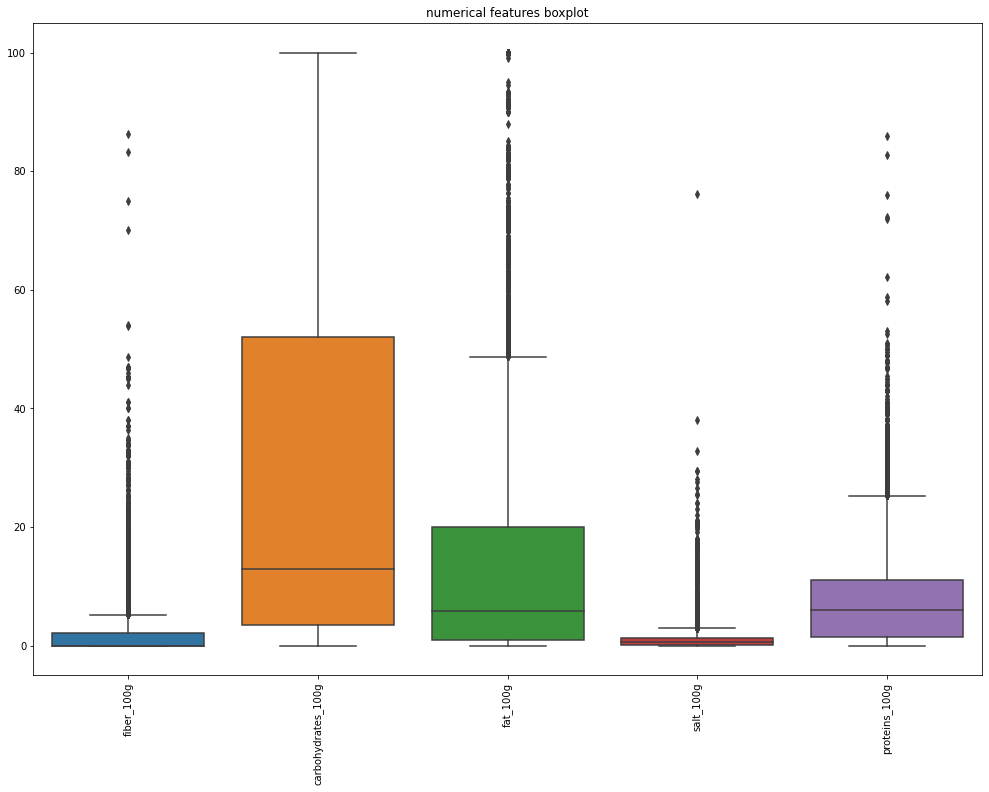

In [8]:
#Boxplot des variables numériques '100g' sans l'energie
#on voit que les variables sont bien comprises entre 0 et 100g

fig = plt.figure(figsize=(17, 12))
ax = plt.axes()
plt.xticks(rotation=90)
sns.boxplot(data=df_num[features_num]).set_title('numerical features boxplot');

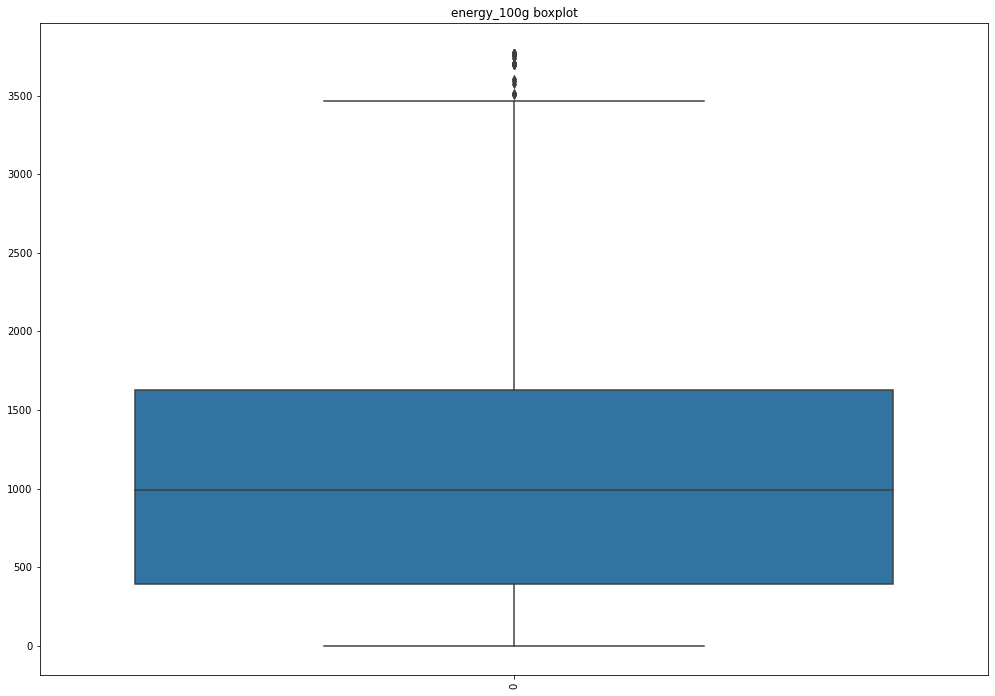

In [9]:
#on trace le boxplot de la variable energy 100g
#on voit que l'energie est bien compris entre 0 et 3700 Kj

fig = plt.figure(figsize=(17, 12))
ax = plt.axes()
plt.xticks(rotation=90)
sns.boxplot(data=df['energy_100g']).set_title('energy_100g boxplot');

#### Distribution 

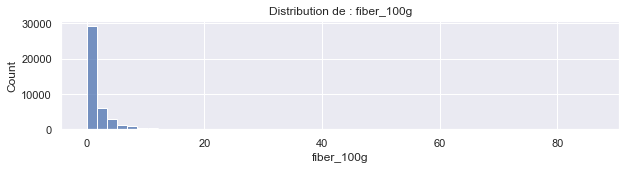

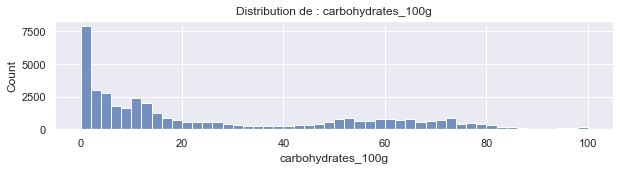

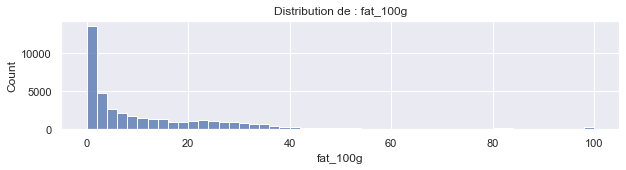

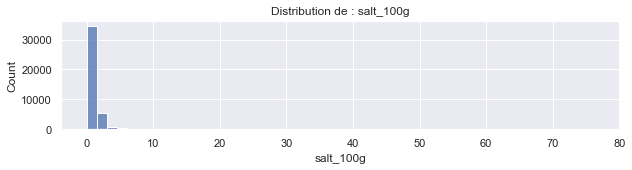

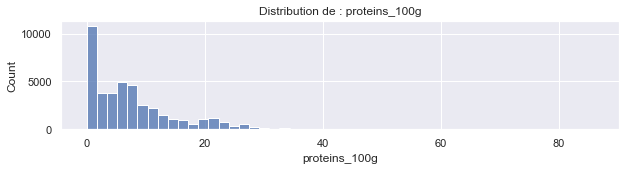

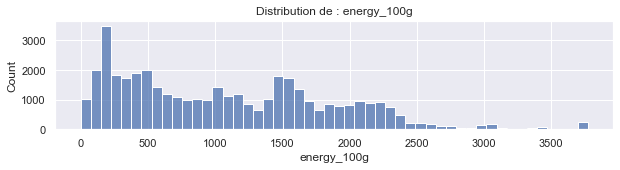

In [10]:
#on regarde la distribution des variables 100g
features_num = df_num.columns.tolist()

for column in features_num:
    plt.figure(figsize = (10,2))
    sns.set(font_scale=1)
    sns.histplot(df[column], bins=50)
    chaine = 'Distribution de : ' + column
    plt.title(chaine)
    plt.xlabel(column)
    plt.show();

On observe que certaines distributions ont une allure assez semblable:

- fat_100g
- carbohydrates_100g (à l’exception de la partie entre 40 et 80g)
- fiber_100g
- salt_100g

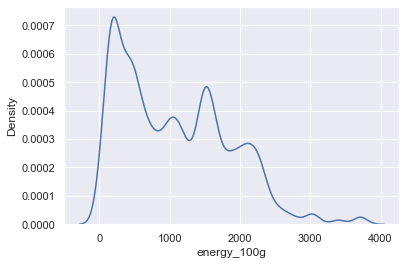

In [11]:
sns.kdeplot(data=df, x="energy_100g");

### Features catégorielles

In [12]:
df_cat.head()

,code,product_name,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,brands
0,40608754,"Pepsi, Nouveau goût !",e,Beverages,Sweetened beverages,Pepsi
1,87177756,7Up,e,Beverages,Sweetened beverages,"7Up,Pepsico"
2,10,Madeleines nature,d,Sugary snacks,Biscuits and cakes,Bijou
3,30,Cakes Raisins,d,Sugary snacks,Biscuits and cakes,Bijou
4,31,Cakes aux Fruits,d,Sugary snacks,Biscuits and cakes,Bijou


#### Barplot

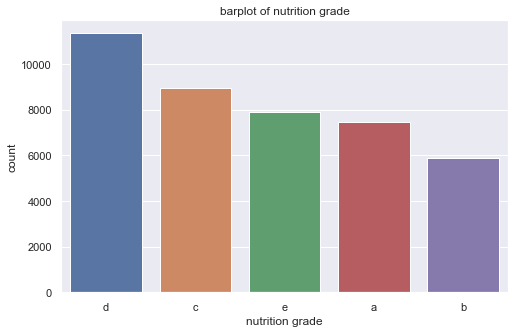

In [13]:
#barplot du nutriscore 
#On voit la repartition du nutriscore dans les données : il y a plus de nutriscore "d" et moins de "b"

sns.set(rc={'figure.figsize':(8,5)})
comptage_nutrition_grade = df['nutrition_grade_fr'].value_counts()
g = sns.barplot(x=comptage_nutrition_grade.index, y=comptage_nutrition_grade.values)
g.set(xlabel ="nutrition grade", ylabel = "count", title ='barplot of nutrition grade');

#### Camembert

In [14]:
df_count_nutriscore = pd.DataFrame(comptage_nutrition_grade).reset_index().rename(columns = {'index':'nutrition score', 'nutrition_grade_fr':'count'})


In [15]:
df_count_nutriscore

,nutrition score,count
0,d,11343
1,c,8937
2,e,7902
3,a,7466
4,b,5876


Pie

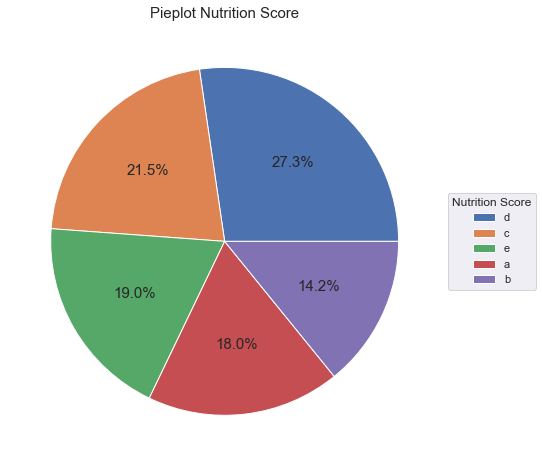

In [16]:
#camembert du nutriscore pour voir la repartition de la variable 

fig, ax = plt.subplots(figsize=(15,8), subplot_kw=dict(aspect="equal"))
wedges, texts, autotexts = ax.pie(df_count_nutriscore['count'],
                                  autopct='%1.1f%%')

ax.legend(wedges, df_count_nutriscore['nutrition score'],
          title="Nutrition Score",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=15)
ax.set_title("Pieplot Nutrition Score", size=15)

plt.show()

#### Countplot

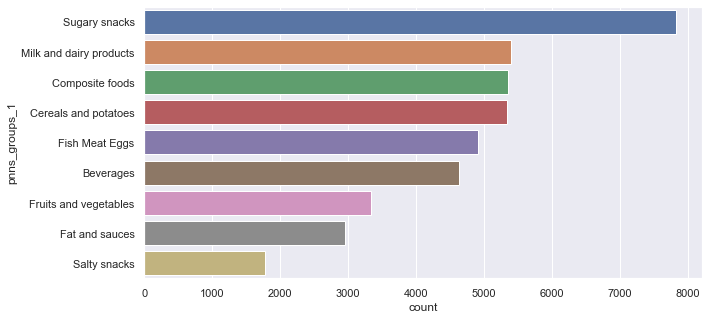

In [17]:
# On affiche le countplot de la variable pnns_groups_1 
# on voit la repartition des différentes catégorie de produit : il y a beaucoup de "sugary snacks" dans la base de donnée 
plt.figure(figsize=(10, 5))
pnns1_order = df['pnns_groups_1'].value_counts().index
sns.countplot(y="pnns_groups_1", order=pnns1_order, data=df);

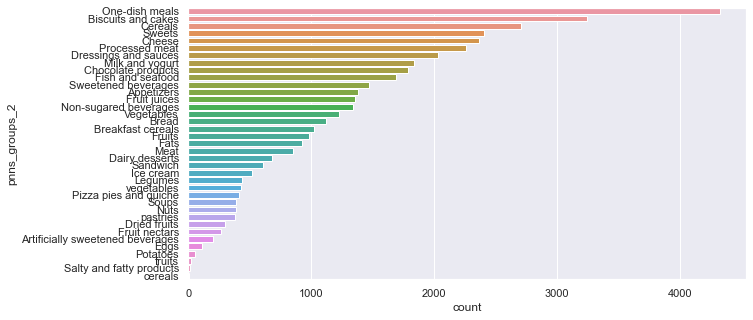

In [18]:
# On affiche le countplot de la variable pnns_groups_2 
# on voit la repartition des différentes catégorie de produit : il y a beaucoup de "one dish meal" dans la base de donnée 

plt.figure(figsize=(10, 5))
pnns2_order = df['pnns_groups_2'].value_counts().index
sns.countplot(y="pnns_groups_2", order=pnns2_order, data=df);

## Analyse bi-variée 

### Features numériques entre elles

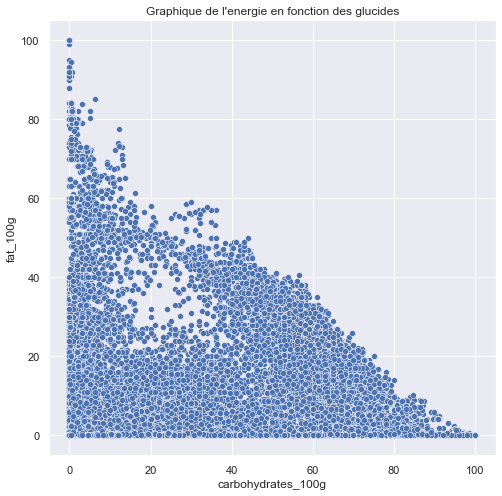

In [19]:
# on affiche le nuage de point des variables proteines et glucides :
#Le graphique est en forme de triangle : on a bien la somme des variable inférieur à 100g

sns.set(rc = {'figure.figsize':(8,8)})
sns.scatterplot(data=df,x='carbohydrates_100g',y='fat_100g').set(title="Graphique de l'energie en fonction des glucides");                                                            

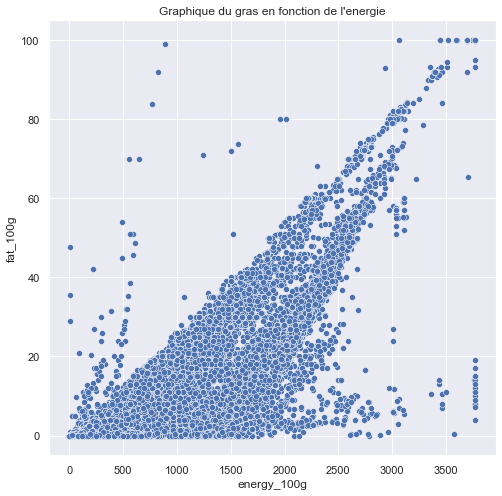

In [20]:
#scatter plot des glucides et du gras : 
#on voit bien que la somme des variable est inférieur à 100g

sns.set(rc = {'figure.figsize':(8,8)})
sns.scatterplot(data=df,x='energy_100g',y='fat_100g').set(title="Graphique du gras en fonction de l'energie");


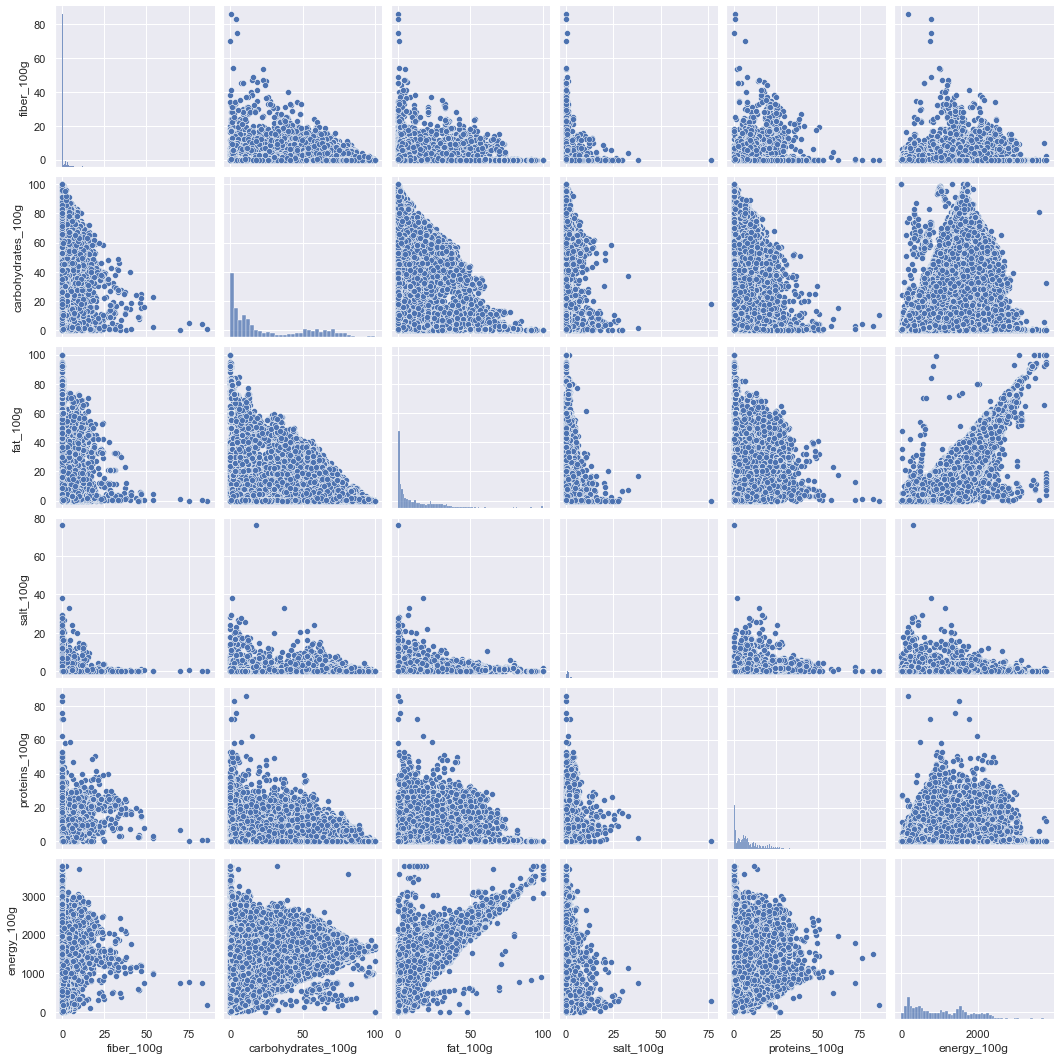

In [21]:
#pairplot des données numériques : 
#on voit les nuages de points de toutes les données numériques en même temps
sns.pairplot(df_num);

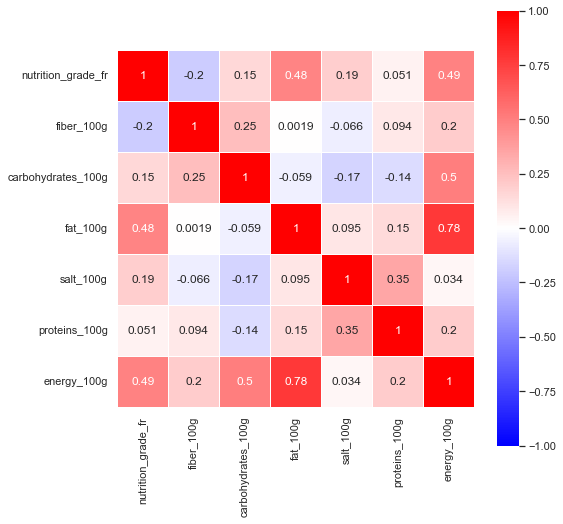

In [22]:
# Heatmap de correlation des variables numérique et de la variable Nutrition Grade
#on voit une correlation entre la variable nutrition grade et les variables gras et energy
#On voit aussi une correlation entre l'energie et les variables gras et carbohydrates

sns.heatmap(df.assign(nutrition_grade_fr = df['nutrition_grade_fr'].astype('category').cat.codes).corr(), 
            annot = True, cmap = 'bwr',vmin = -1, vmax = 1, square = True, linewidths = 0.5);

### Feature numérique / feature catégorielle

On souhaite maintenant comprendre l'influence du Nutrition Grade sur les informations nutritionnelles

#### Boxplot

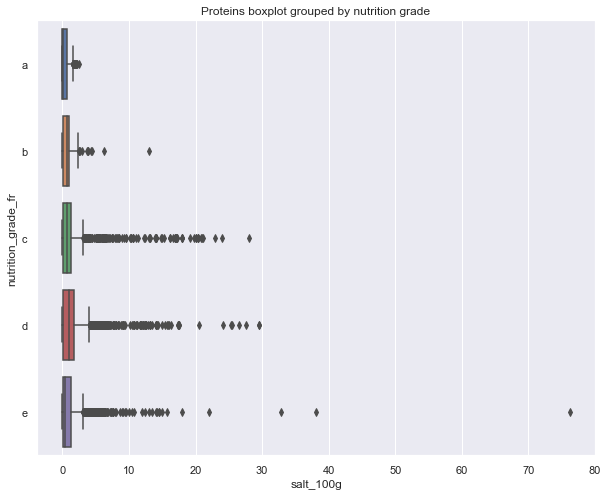

In [23]:
#On fait un grouped boxplot pour visualiser la distribution du sel en fonction du Nutrition Grade

fig = plt.figure(figsize=(10, 8))
sns.boxplot(data=df, x="salt_100g", y="nutrition_grade_fr", order=["a", "b","c","d","e"]).set_title('Proteins boxplot grouped by nutrition grade');


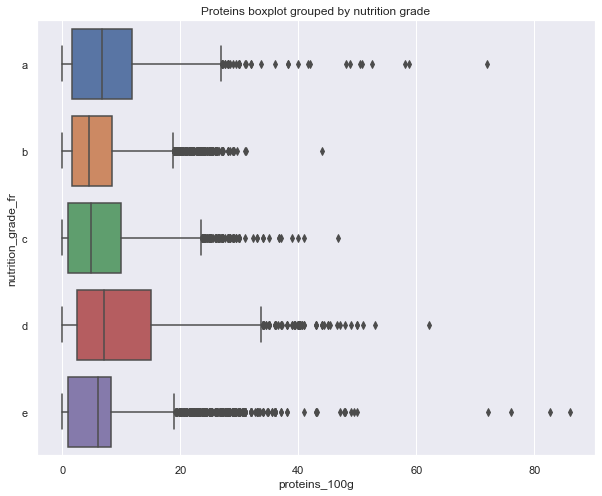

In [24]:
#On fait un grouped boxplot pour visualiser la distribution des proteines en fonction du Nutrition Grade

fig = plt.figure(figsize=(10, 8))
sns.boxplot(data=df, x="proteins_100g", y="nutrition_grade_fr", order=["a", "b","c","d","e"]).set_title('Proteins boxplot grouped by nutrition grade');


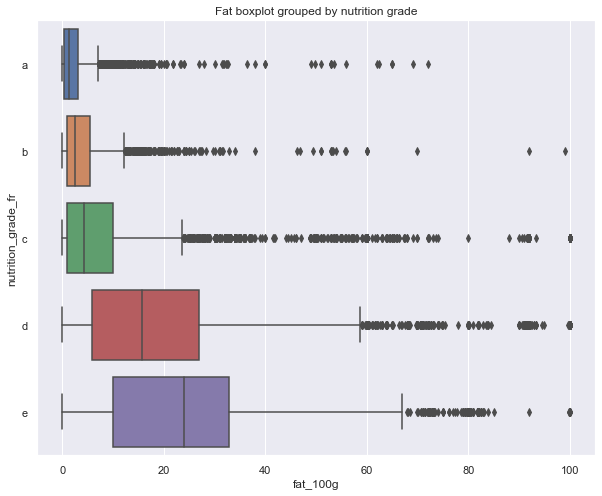

In [25]:
#On fait un grouped boxplot pour visualiser la distribution du gras en fonction du Nutrition Grade
fig = plt.figure(figsize=(10, 8))
ax = plt.axes()
#plt.xticks(rotation=90)
sns.boxplot(data=df, x="fat_100g", y="nutrition_grade_fr", order=["a", "b","c","d","e"]).set_title('Fat boxplot grouped by nutrition grade');


Le gras et le sel n'ont pas d'influence sur le nutrigrade

Les proteines n'ont pas d'influence sur le nutrigrade

## Analyse multi-variée 

In [26]:
df.head()

,code,product_name,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,brands,fiber_100g,carbohydrates_100g,fat_100g,salt_100g,proteins_100g,energy_100g
0,40608754,"Pepsi, Nouveau goût !",e,Beverages,Sweetened beverages,Pepsi,0.0,10.4,0.0,0.0254,0.0,177.0
1,87177756,7Up,e,Beverages,Sweetened beverages,"7Up,Pepsico",0.0,10.4,0.0,0.1000,0.0,177.0
2,10,Madeleines nature,d,Sugary snacks,Biscuits and cakes,Bijou,1.5,55.0,23.0,0.6600,6.0,1900.0
3,30,Cakes Raisins,d,Sugary snacks,Biscuits and cakes,Bijou,1.8,56.0,19.0,0.6500,5.8,1768.0
4,31,Cakes aux Fruits,d,Sugary snacks,Biscuits and cakes,Bijou,1.5,60.0,15.0,0.6000,4.9,1670.0


In [27]:
#on encode les données des variables catégorielles
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
#on applique le label encoder au dataframe
df_cat_enc = df_cat.astype(str).apply(le.fit_transform)
df_cat_enc

,code,product_name,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,brands
0,34790,23058,4,0,30,5671
1,41091,1311,4,0,30,28
2,0,18473,3,8,2,562
3,2647,4643,3,8,2,562
4,5831,4646,3,8,2,562
...,...,...,...,...,...,...
41519,41509,29905,2,8,31,2313
41520,41510,11633,1,8,31,2313
41521,41514,20871,2,7,0,4581
41522,41516,30961,0,1,3,3834


In [28]:
df_cat_acp = df_cat_enc.drop(['code','product_name','brands','pnns_groups_1','pnns_groups_2'],axis=1)
df_acp_enc = df_cat_acp.join(df_num)

In [29]:
df_acp_enc.dtypes

nutrition_grade_fr      int64
fiber_100g            float64
carbohydrates_100g    float64
fat_100g              float64
salt_100g             float64
proteins_100g         float64
energy_100g           float64
dtype: object

In [30]:
#on va séparer nos données. D'un coté X la matrice des données :
X = df_acp_enc.values
X[:5]

array([[4.000e+00, 0.000e+00, 1.040e+01, 0.000e+00, 2.540e-02, 0.000e+00,
        1.770e+02],
       [4.000e+00, 0.000e+00, 1.040e+01, 0.000e+00, 1.000e-01, 0.000e+00,
        1.770e+02],
       [3.000e+00, 1.500e+00, 5.500e+01, 2.300e+01, 6.600e-01, 6.000e+00,
        1.900e+03],
       [3.000e+00, 1.800e+00, 5.600e+01, 1.900e+01, 6.500e-01, 5.800e+00,
        1.768e+03],
       [3.000e+00, 1.500e+00, 6.000e+01, 1.500e+01, 6.000e-01, 4.900e+00,
        1.670e+03]])

In [31]:
#le type de la matrice
type(X)

numpy.ndarray

In [32]:
#la forme de cette matrice
X.shape

(41524, 7)

In [33]:
#On garde les index dans une variable
keep_ind = df_acp_enc.index
keep_ind

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            41514, 41515, 41516, 41517, 41518, 41519, 41520, 41521, 41522,
            41523],
           dtype='int64', length=41524)

In [34]:
#et nos colonnes, nos features, dans une variable features :
features = df_acp_enc.columns
features

Index(['nutrition_grade_fr', 'fiber_100g', 'carbohydrates_100g', 'fat_100g',
       'salt_100g', 'proteins_100g', 'energy_100g'],
      dtype='object')

In [35]:
#on standardise les données des variables numériques
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#on fit 
scaler.fit(X)
#on transforme 
X_scaled = scaler.transform(X)
X_scaled[:5]

array([[ 1.35027157, -0.50651055, -0.58419398, -0.75399777, -0.60924019,
        -1.03485741, -1.15879722],
       [ 1.35027157, -0.50651055, -0.58419398, -0.75399777, -0.55467548,
        -1.03485741, -1.15879722],
       [ 0.6193446 , -0.02631724,  1.0634782 ,  0.61747196, -0.14507445,
        -0.2238746 ,  1.05146166],
       [ 0.6193446 ,  0.06972143,  1.10042153,  0.37895549, -0.15238876,
        -0.25090736,  0.88213248],
       [ 0.6193446 , -0.02631724,  1.24819482,  0.14043901, -0.18896028,
        -0.37255478,  0.75641839]])

In [36]:
#On espère avoir une moyenne à 0 et un écart type à 1 
idx = ["mean", "std"]

pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

,0,1,2,3,4,5,6
mean,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0


### Analyse multi-variée descriptive : Analyse en composante principale (ACP)

on effectue une ACP

In [37]:
from sklearn import decomposition

acp = decomposition.PCA(n_components=len(features))
acp.fit(X_scaled)

PCA(n_components=7)

### Explained variance & scree plot

On affiche l'**ébouli des valeurs propres** : niveau de variance expliquée par les composantes principales

In [38]:
print(acp.n_components_) 

7


In [39]:
#On va s'interesser à la variance captée par chaque nouvelle composante.
#avec scikit-learn on peut utiliser l'attribut explained_variance_ratio_ :
print(acp.explained_variance_ratio_)

[0.33329506 0.22179507 0.17332051 0.11777169 0.08695551 0.06181408
 0.00504808]


La première composante capte 33% de la variance de nos données initiales, la deuxième capte 22%... etc

In [40]:
#on enregistre ça dans une variable
scree = (acp.explained_variance_ratio_*100).round(2)
scree

array([33.33, 22.18, 17.33, 11.78,  8.7 ,  6.18,  0.5 ])

Les 2 premières composantes captent donc 34+22 = 56% de la variance,
les 3 premières captent donc 73% de la variance etc etc.
C'est la somme cumulée : on va la calculer

In [41]:
scree_cum = scree.cumsum().round()
scree_cum

array([ 33.,  56.,  73.,  85.,  93., 100., 100.])

In [42]:
#on va definir une variable avec la liste de nos composantes :
x_list = range(1, len(features)+1)
list(x_list)

[1, 2, 3, 4, 5, 6, 7]

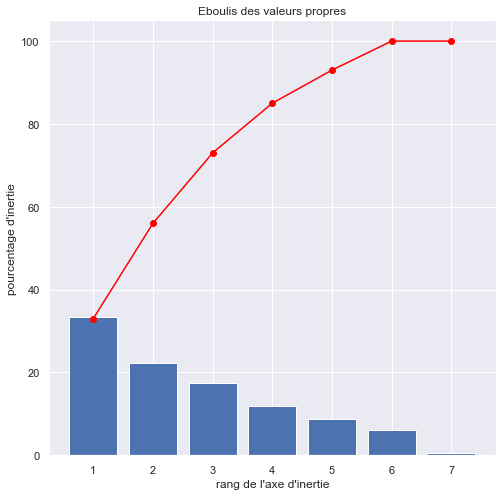

In [43]:
#on affiche graphiquement l'ebouli
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

On a en bleu la variance de chaque nouvelle composante, et en rouge la variance cumulée.

Les deux premières composantes principales expliquent environ 60% de la variance.

On voit ici que pres de 80% de la variance est comprise dans les 4 premières composantes, et pres de 90% dans les 5 premières.

In [44]:
#on réeffectue donc une ACP avec 4 composantes
from sklearn import decomposition

acp = decomposition.PCA(n_components=4)
acp.fit(X_scaled)

PCA(n_components=4)

In [45]:
#on va redefinir une variable avec la liste de nos composantes :
x_list = range(1, 5)
list(x_list)

[1, 2, 3, 4]

In [46]:
print(acp.n_components_) 

4


### Components

La formule de calcul des composantes nous est donnée par l'attribut components_. 
On va les stocker dans la variable pcs

In [47]:
pcs = acp.components_
pcs

array([[ 0.46046279,  0.07506114,  0.23650071,  0.54289489,  0.13480931,
         0.18577831,  0.61561779],
       [ 0.14669269, -0.38158931, -0.58052041,  0.12278027,  0.53651506,
         0.39791825, -0.18602304],
       [-0.36929584,  0.65733962,  0.08000507, -0.13717954,  0.28289939,
         0.56876565,  0.05272322],
       [ 0.28802772, -0.21098843,  0.58922122, -0.50461693,  0.5140928 ,
        -0.02230609, -0.07690942]])

In [48]:
pcs = pd.DataFrame(pcs)
pcs

,0,1,2,3,4,5,6
0,0.460463,0.075061,0.236501,0.542895,0.134809,0.185778,0.615618
1,0.146693,-0.381589,-0.580520,0.122780,0.536515,0.397918,-0.186023
2,-0.369296,0.657340,0.080005,-0.137180,0.282899,0.568766,0.052723
3,0.288028,-0.210988,0.589221,-0.504617,0.514093,-0.022306,-0.076909


In [49]:
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,nutrition_grade_fr,fiber_100g,carbohydrates_100g,fat_100g,salt_100g,proteins_100g,energy_100g
F1,0.46,0.08,0.24,0.54,0.13,0.19,0.62
F2,0.15,-0.38,-0.58,0.12,0.54,0.40,-0.19
F3,-0.37,0.66,0.08,-0.14,0.28,0.57,0.05
F4,0.29,-0.21,0.59,-0.50,0.51,-0.02,-0.08


In [50]:
# on peut aussi transposer le dataframe
pcsT = pcs.T
pcsT

,F1,F2,F3,F4
nutrition_grade_fr,0.460463,0.146693,-0.369296,0.288028
fiber_100g,0.075061,-0.381589,0.657340,-0.210988
carbohydrates_100g,0.236501,-0.580520,0.080005,0.589221
fat_100g,0.542895,0.122780,-0.137180,-0.504617
salt_100g,0.134809,0.536515,0.282899,0.514093
proteins_100g,0.185778,0.397918,0.568766,-0.022306
energy_100g,0.615618,-0.186023,0.052723,-0.076909


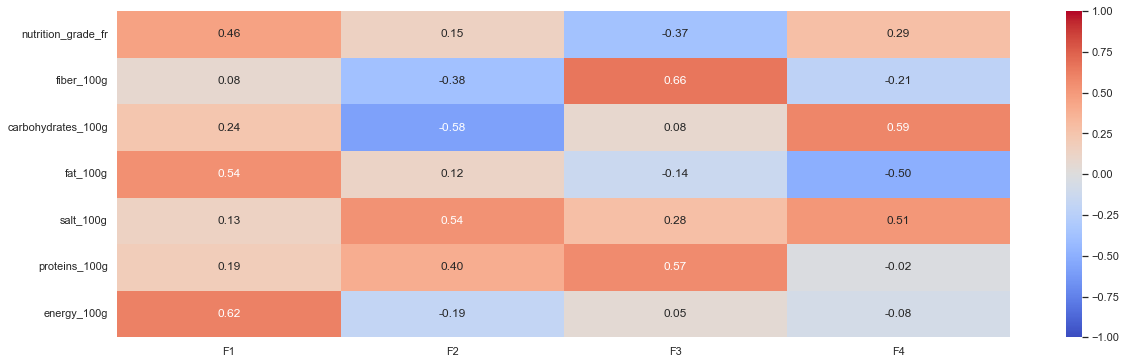

In [51]:
#on peut aussi l'afficher sous forme de heatmap
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f");

### Correlation graph

On va tracer le cercle de corrélation qui permet de montrer graphiquement sur chaque plan en 2D les corrélations entre les features et le nutriscore.

On doit definir nos axes x et y. 
On va utiliser les 2 premières composantes. 
Comme - en code - on commence à compter à partir de 0, cela nous donne :

In [52]:
x, y = 0,1

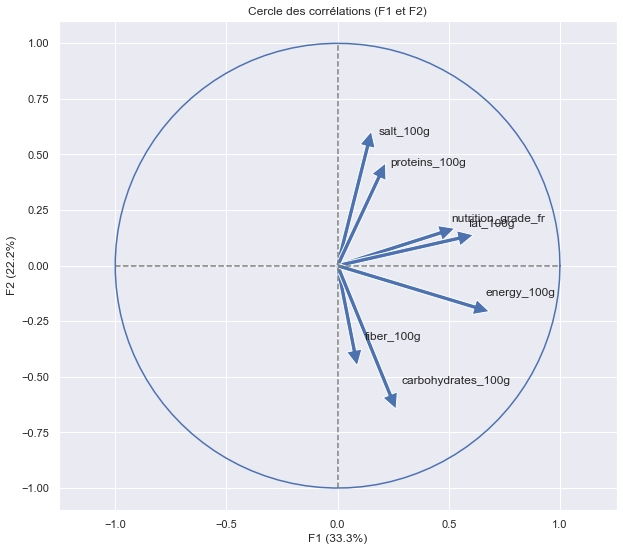

In [53]:
fig, ax = plt.subplots(figsize=(10, 9))
for i in range(0, acp.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             acp.components_[0, i],  #0 for PC1
             acp.components_[1, i],  #1 for PC2
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )

    plt.text(acp.components_[0, i] + 0.05,
             acp.components_[1, i] + 0.05,
             features[i])
    
# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x+1, round(100*acp.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*acp.explained_variance_ratio_[y],1)))

plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
plt.show(block=False)

In [54]:
#fontion pour tracer le cercle de correlation
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # J'ai copié collé le code sans le lire
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

In [55]:
#pour F1 et F2
x_y = (0,1)
x_y

(0, 1)

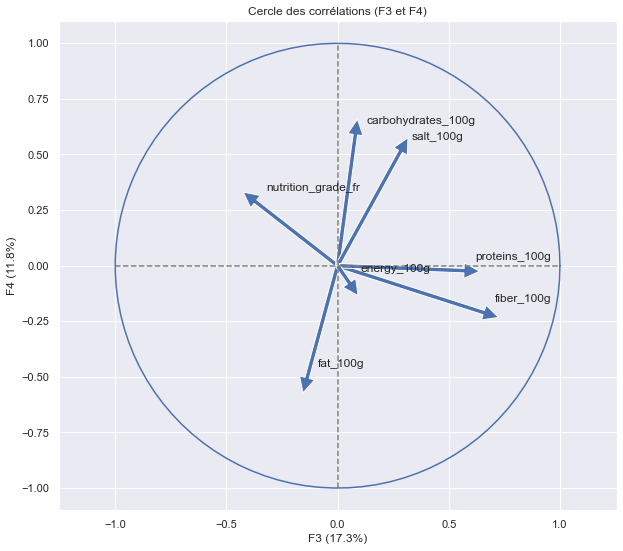

In [56]:
#pour F3 et F4
correlation_graph(acp, (2,3), features)

On remarque que proteins et les fibres sont très correlés à F3 : on pourrait se dire que cela represente un bon nutriscore ('a') donc un nutriscore faible

En effet, le nutrigrade est inversement correlé à F3 

On a bien plus F3 augmente, plus le nutrigrade est faible

L'energie a une fleche trop courte donc pas interpretable

Fat est inversement correlé à F4 et carbohydrates et salt correlé à F3

### Projection 

La projection des individus apporte un complément d’analyse en coloriant les points selon une catégorie afin de confirmer des regroupements selon ces catégories

In [57]:
X_proj = acp.transform(X_scaled)
X_proj[:5]

array([[-0.95153477,  0.11482224, -1.5969451 ,  0.33104411],
       [-0.94417894,  0.14409703, -1.58150877,  0.35909543],
       [ 1.45609554, -0.80317623, -0.35857883,  0.3485229 ],
       [ 1.23230187, -0.87373696, -0.28614567,  0.48025286],
       [ 1.02563075, -0.99680135, -0.39089649,  0.70152744]])

In [58]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)


    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()

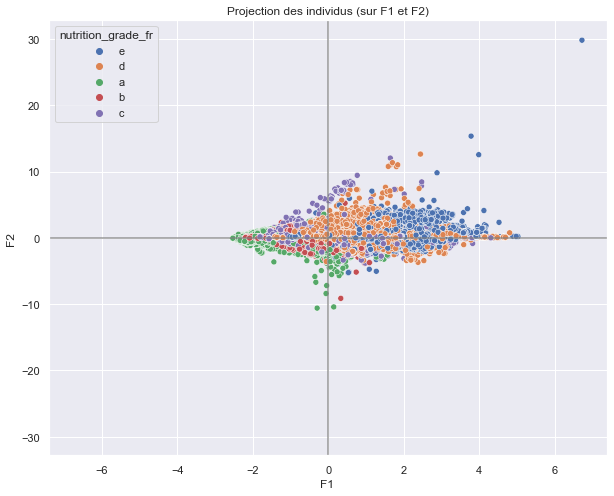

In [59]:
x_y = [0,1]
display_factorial_planes(X_proj, x_y, clusters=df['nutrition_grade_fr'])

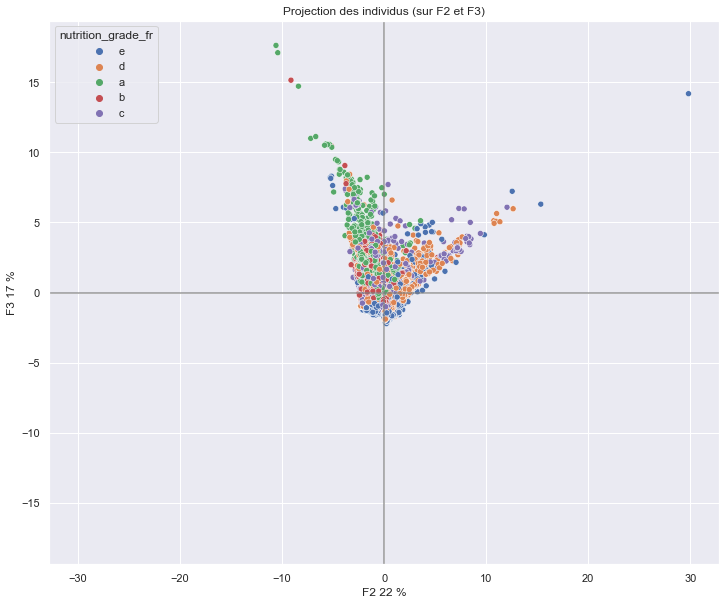

In [60]:
x_y = 1,2
display_factorial_planes(X_proj, x_y, acp, figsize=(12,10), clusters=df['nutrition_grade_fr'],marker="o")


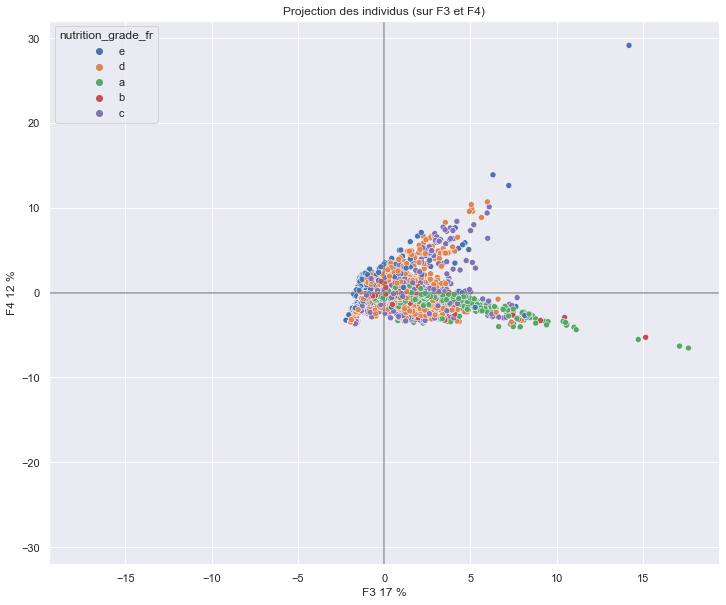

In [61]:
x_y = 2,3
display_factorial_planes(X_proj, x_y, acp, figsize=(12,10), clusters=df['nutrition_grade_fr'],marker="o")


In [62]:
acp_df = pd.DataFrame(X_proj)
acp_df['nutrition_grade_fr'] = df.loc[keep_ind, 'nutrition_grade_fr']
acp_df['pnns_groups_1'] = df.loc[keep_ind, 'pnns_groups_1']
acp_df

,0,1,2,3,nutrition_grade_fr,pnns_groups_1
0,-0.951535,0.114822,-1.596945,0.331044,e,Beverages
1,-0.944179,0.144097,-1.581509,0.359095,e,Beverages
2,1.456096,-0.803176,-0.358579,0.348523,d,Sugary snacks
3,1.232302,-0.873737,-0.286146,0.480253,d,Sugary snacks
4,1.025631,-0.996801,-0.390896,0.701527,d,Sugary snacks
...,...,...,...,...,...,...
41519,-0.173347,-2.130037,-0.758385,1.640363,c,Sugary snacks
41520,-0.469844,-2.411057,-0.184475,1.315918,b,Sugary snacks
41521,0.433350,-0.107063,1.075611,-0.478347,c,Salty snacks
41522,0.045993,-1.789198,2.125761,0.470338,a,Cereals and potatoes


<Figure size 504x504 with 0 Axes>

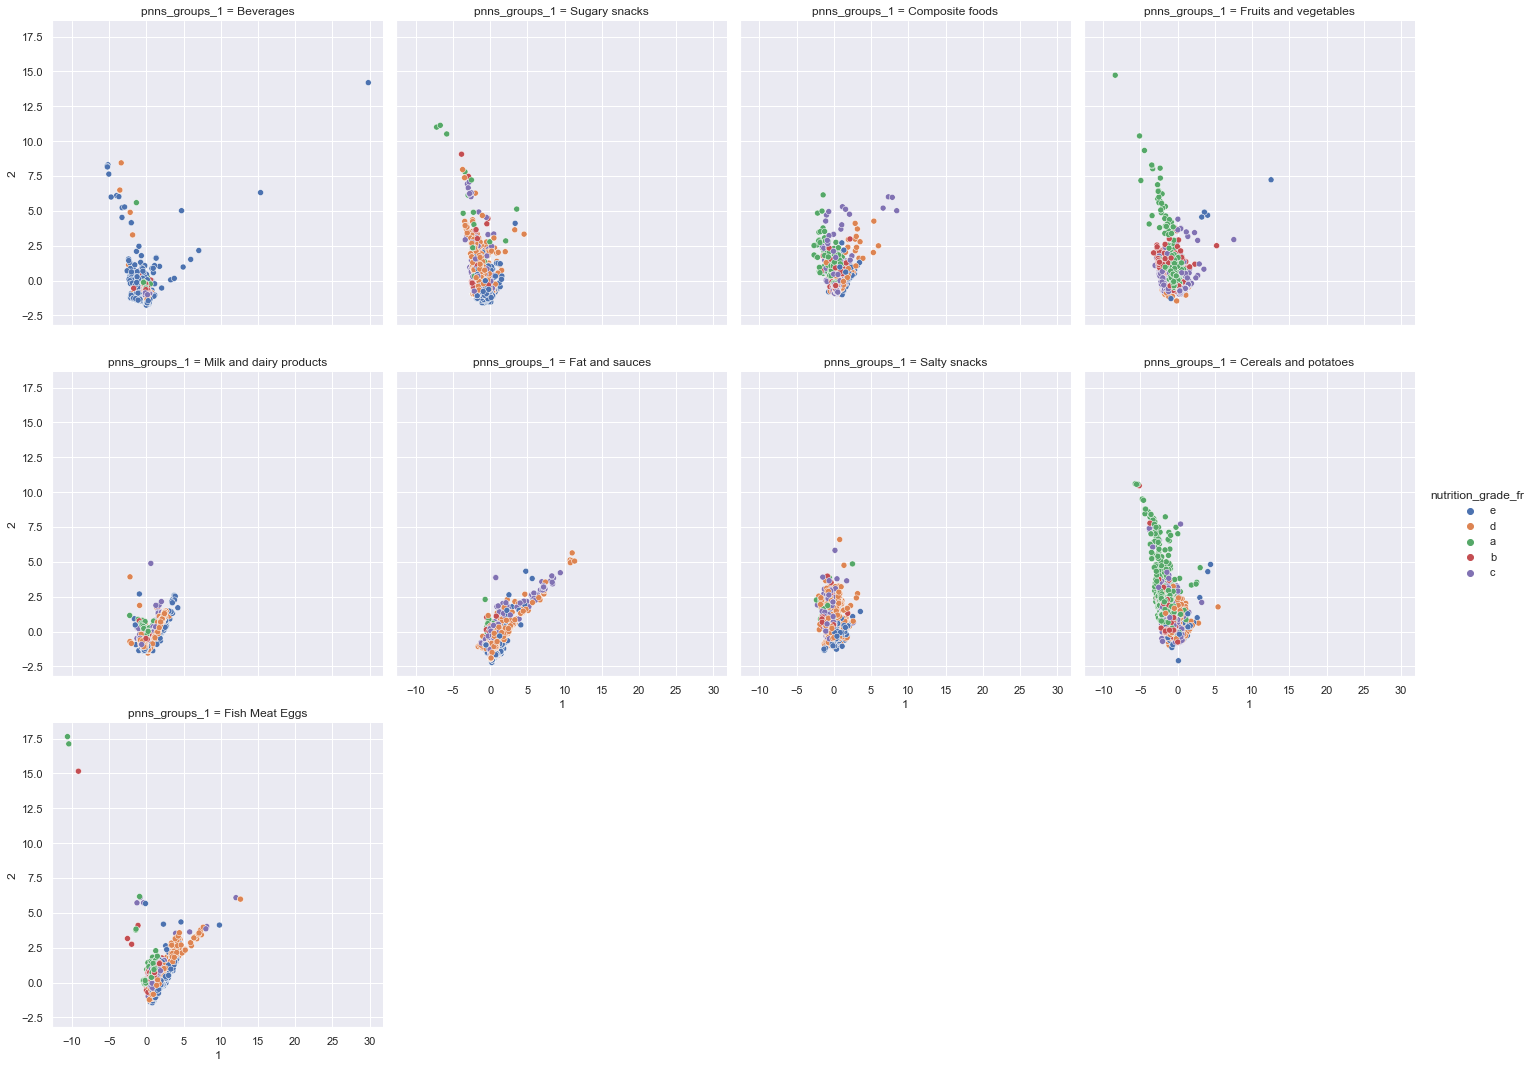

In [63]:
plt.figure(figsize=(7, 7))
sns.relplot(data=acp_df, x=1, y=2, col='pnns_groups_1', col_wrap=4, hue='nutrition_grade_fr');

<Figure size 504x504 with 0 Axes>

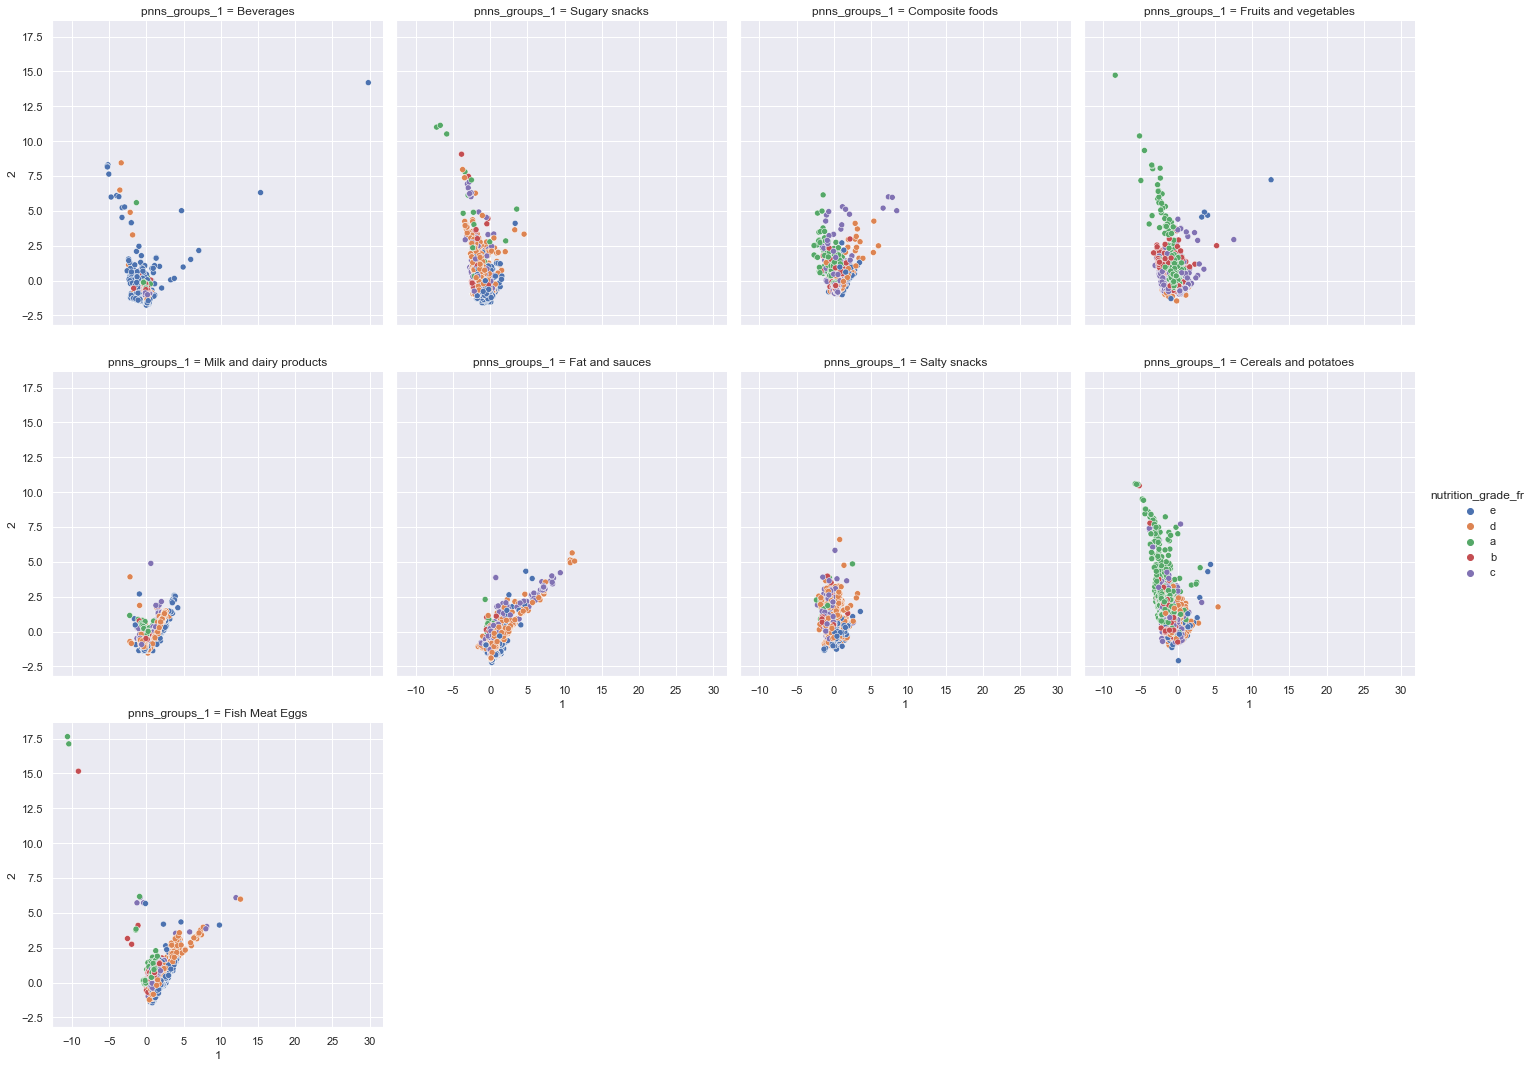

In [64]:
plt.figure(figsize=(7, 7))
sns.relplot(data=acp_df, x=1, y=2, col='pnns_groups_1', col_wrap=4, hue='nutrition_grade_fr');

## ANOVA

On va réaliser une analyse ANOVA qui permet d'étudier la relation entre une variable quantitative et une variable catégorielle.

On utilisera l'analyse de la variance à un facteur qui permet de comparer les moyennes d'échantillon. 

L'objectif de ce test est de conclure sur l'influence d'une variable explicative catégorielle sur la loi d'une variable continue à expliquer.

In [65]:
df.head()

,code,product_name,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,brands,fiber_100g,carbohydrates_100g,fat_100g,salt_100g,proteins_100g,energy_100g
0,40608754,"Pepsi, Nouveau goût !",e,Beverages,Sweetened beverages,Pepsi,0.0,10.4,0.0,0.0254,0.0,177.0
1,87177756,7Up,e,Beverages,Sweetened beverages,"7Up,Pepsico",0.0,10.4,0.0,0.1000,0.0,177.0
2,10,Madeleines nature,d,Sugary snacks,Biscuits and cakes,Bijou,1.5,55.0,23.0,0.6600,6.0,1900.0
3,30,Cakes Raisins,d,Sugary snacks,Biscuits and cakes,Bijou,1.8,56.0,19.0,0.6500,5.8,1768.0
4,31,Cakes aux Fruits,d,Sugary snacks,Biscuits and cakes,Bijou,1.5,60.0,15.0,0.6000,4.9,1670.0


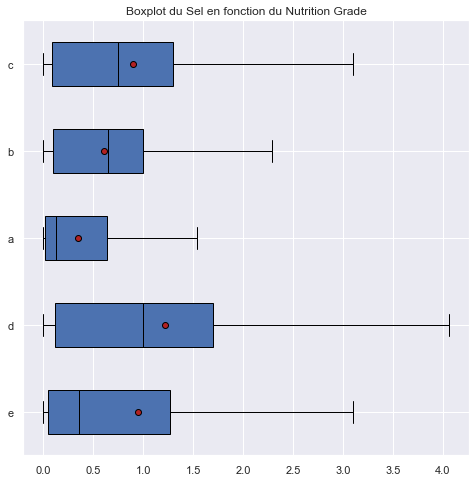

In [66]:
X = "nutrition_grade_fr" # qualitative
Y = "salt_100g" # quantitative

modalites = df[X].unique()
groupes = []
for m in modalites:
    groupes.append(df[df[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.title('Boxplot du Sel en fonction du Nutrition Grade')
plt.show()

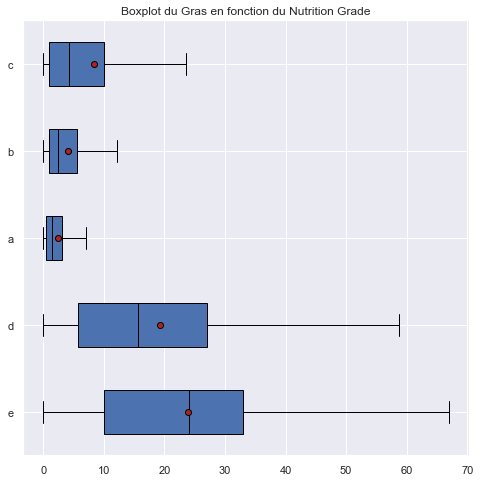

In [67]:
X = "nutrition_grade_fr" # qualitative
Y = "fat_100g" # quantitative

modalites = df[X].unique()
groupes = []
for m in modalites:
    groupes.append(df[df[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.title('Boxplot du Gras en fonction du Nutrition Grade')
plt.show()

Les points rouges au milieu de chaque boîte à moustaches représentent la moyenne des valeurs.

On voit qu'il n'y a pas vraiment de variation de la moyenne de la quantité de sel en fonction du nutrition grade (echelle faible)

Par contre, on voit qu'il y a une variation de la moyenne de la quantité de gras en fonction du nutrition grade

#### Calcul de eta squared : le rapport de correlation

X et Y, respectivement variables qualitatives et quantitatives étudiées
- Si  eta squared =0 : 
Les moyennes par classes sont toutes égales. Il n’y a donc pas à priori de relation entre les variables Y et X. 

- Si eta squared =1
Les moyennes par classes sont très différentes, chacune des classes étant constituée de valeurs identiques : il existe donc à priori une relation entre les variables Y et X.

In [68]:
#Fonction pour le calcul de eta squared  : 

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT

In [69]:
#calcul de eta squared pour le nutrigrade et le sel
X = "nutrition_grade_fr" 
Y = "salt_100g" 
eta_squared(df[X],df[Y]) 

0.050785339822067455

Le resultat est de 0.05, proche de 0, donc cela peut laisser penser qu'il n'y a pas de correlation entre les deux variables

In [70]:
#calcul de eta squared pour le nutrigrade et le gras
X = "nutrition_grade_fr"
Y = "fat_100g" 
eta_squared(df[X],df[Y])

0.24539890083380855

Le resultat est de 0.24, donc cela peut laisser penser qu'il y a une correlation entre les deux variables

In [71]:
df.columns

Index(['code', 'product_name', 'nutrition_grade_fr', 'pnns_groups_1',
       'pnns_groups_2', 'brands', 'fiber_100g', 'carbohydrates_100g',
       'fat_100g', 'salt_100g', 'proteins_100g', 'energy_100g'],
      dtype='object')

In [72]:
df_num.columns

Index(['fiber_100g', 'carbohydrates_100g', 'fat_100g', 'salt_100g',
       'proteins_100g', 'energy_100g'],
      dtype='object')

In [73]:
liste_eta_squared = []
for column in df_num.columns.tolist(): 
    liste_eta_squared.append(eta_squared(df["nutrition_grade_fr"],df[column]))

print(liste_eta_squared)

[0.06361163456172388, 0.04841193215731678, 0.24539890083380855, 0.050785339822067455, 0.02486445004086974, 0.2807875041935456]


- Les variables Fiber, Carbohydrates, Salt et Proteins ont un score faible (proche de 0) donc cela peut laisser penser qu'il n'y a pas de relation entre ces variables et le nutrition grade
- Les variables Fat et Energy ont un score proche de 0.2 (les moyennes par classe sont assez differentes) donc cela peut laisser penser qu'il y a une relation entre ces variables et le nutrition grade 

#### Calcul avec Statsmodels

In [74]:
import statsmodels.api
result = statsmodels.formula.api.ols('proteins_100g ~ nutrition_grade_fr', data = df).fit()  
table = statsmodels.api.stats.anova_lm(result, typ = 2)
table

,sum_sq,df,F,PR(>F)
nutrition_grade_fr,5.651415e+04,4.0,264.667589,5.108424e-225
Residual,2.216376e+06,41519.0,NaN,NaN


In [75]:
result = statsmodels.formula.api.ols('fat_100g ~ nutrition_grade_fr', data = df).fit()  
table = statsmodels.api.stats.anova_lm(result, typ = 2)
table

,sum_sq,df,F,PR(>F)
nutrition_grade_fr,2.865860e+06,4.0,3375.530785,0.0
Residual,8.812514e+06,41519.0,NaN,NaN


In [76]:
result = statsmodels.formula.api.ols('fiber_100g ~ nutrition_grade_fr', data = df).fit()  
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:             fiber_100g   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     705.1
Date:                Tue, 07 Feb 2023   Prob (F-statistic):               0.00
Time:                        13:52:07   Log-Likelihood:            -1.0485e+05
No. Observations:               41524   AIC:                         2.097e+05
Df Residuals:                   41519   BIC:                         2.098e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [77]:
#calculer eta-squared
esq_sm = table['sum_sq'][0]/(table['sum_sq'][0]+table['sum_sq'][1])
esq_sm

0.2453989008338205

La p-value (PR(>F)) est inférieur à 5% donc on rejette l'hypothèse selon laquelle nutrition_grade_fr n'influe pas sur energy_100g.

La modalité testée 'nutrition_grade_fr' a un effet statistique significatif sur les variables : fiber, energy